# 风管模型第一次作业

## 选取股票投资组合

人工智能已经到了iPhone时刻。人工智能的竞争壁垒在于数据和算力，模型和人才反而是其次。随着数据量和参数量的暴涨，人工智能的稳健性也逐步提升，大量的大模型都是简洁而优雅的，叠加大量的数据和算力进行训练，得到令我们瞠目结舌的AGI。

算力部分，我们关注寒武纪和景嘉微。景嘉微为GPU制造商，虽然无法与Nvidia抗衡，但也是国产GPU的唯一一个能用的。我们更看好ASIC芯片，可以通过叠很多芯片造就很强的硬件性能，并通过优化实现很高的硬件利用率，Google的TPU便是如此工作的。因此我们看好寒武纪，思元510性能只比Nvidia A100弱20-30%，在Nvidia断供和国产替代背景下营收有望高速增长。

我们也看好制造服务器业务，浪潮已经在这部分业务中做到了顶尖。拓维信息是华为的供货商，华为盘古大模型的应用可能会带动业务增长。

此外，云厂商也将受益于AI的发展，因此我们推荐中国移动、中国电信。

数据部分，我们看好视觉中国。训练数据、AI生成数据都有可能导致法律侵权风险。视觉中国有大量图片版权，在视觉和多模态大模型训练数据这方面有天然优势。

模型部分，我们建议关注三六零，A股上市的少有的计划研究AI大模型的公司。

应用部分，我们关注汤姆猫和科大讯飞。AI作用在他们产品上可能会带来巨大的飞跃，但也要关注竞品的进展。

### 是否选取银行股

不会覆盖银行行业。当前虽然是经济复苏的背景，居民个人储蓄达到历史高位，房地产仍处底部，房贷需求不足；企业部门盈利修复、收益兑现尚需时日，企业贷款不良率可能撑压。因此我们不看好银行在资产端的修复，没有配置银行股

## 读取历史数据

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg, stats
class DataLoader:
    def __init__(self, path="lib/data.xlsx"):
        data_source = pd.ExcelFile(path)

        df = pd.DataFrame()
        for sheet in data_source.sheet_names:
            df[sheet] = data_source.parse(sheet, index_col=2)["收盘价(元)"]
        self.price = df.dropna().sort_index().tail(501)
        self.r = self.price.pct_change().dropna()
stock_info = DataLoader()
stock_info.r

,寒武纪,浪潮信息,景嘉微,汤姆猫,拓维信息,中国电信,中国移动,科大讯飞,三六零,视觉中国
日期,,,,,,,,,,
2022-01-06,-0.030832,-0.012493,-0.005780,-0.052811,-0.004646,0.000000,0.002021,-0.029703,-0.004728,-0.006192
2022-01-07,-0.034358,-0.057352,-0.031818,-0.039568,-0.033839,0.000000,-0.006601,-0.027473,-0.006334,-0.055685
2022-01-10,0.001977,0.011333,-0.004804,-0.007491,0.000000,0.005025,0.020487,0.007062,-0.003984,0.016907
2022-01-11,0.001754,-0.009437,-0.088316,-0.011321,-0.014493,-0.002500,-0.011937,-0.019435,-0.016800,-0.055556
2022-01-12,0.008534,0.008038,-0.028159,0.009542,0.004902,0.000000,0.000183,-0.007152,0.007323,0.018892
...,...,...,...,...,...,...,...,...,...,...
2023-03-21,0.013333,0.018261,0.000127,0.007541,0.041353,0.013783,-0.003915,-0.005090,0.018090,0.014429
2023-03-22,0.170687,0.051368,0.065773,0.008982,0.100181,0.012085,0.005022,0.014364,0.066098,0.052566
2023-03-23,0.042772,0.100029,0.199976,0.053412,0.046760,0.028358,0.011080,0.100097,0.016667,0.046416


## 确定有效前沿

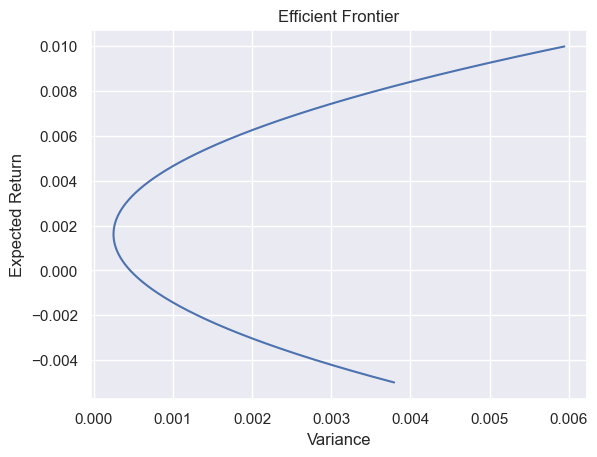

           weights
寒武纪   6.112172e+07
浪潮信息 -7.371855e+07
景嘉微   9.551664e+06
汤姆猫   1.850671e+07
拓维信息  8.702589e+07
中国电信  6.023001e+07
中国移动  4.693401e+06
科大讯飞 -6.448108e+07
三六零  -1.518799e+06
视觉中国 -9.141096e+07


In [2]:
initial_investment = 10_000_000
expected_return = 0.05
class Markowitz:

    def __init__(self, returns):
        self.returns = returns
        self.cov = returns.cov()
        self.company = returns.columns

    def solveMinVar(self, expected_return):
        cov = np.array(self.cov)
        mean = np.array(self.returns.mean())
        row1 = np.append(
            np.append(cov.swapaxes(0, 1), [mean], axis=0), [np.ones(len(mean))], axis=0
        ).swapaxes(0, 1)
        row2 = list(np.ones(len(mean)))
        row2.extend([0, 0])
        row3 = list(mean)
        row3.extend([0, 0])
        A = np.append(row1, np.array([row2, row3]), axis=0)
        b = np.append(np.zeros(len(mean)), [1, expected_return], axis=0)
        results = linalg.solve(A, b)

        return pd.DataFrame({"weights":results[:-2]}, index=self.company)

    def calVar(self, portion):
        portion = portion.values
        return np.dot(np.dot(portion.T, self.cov), portion)[0]

    def plotFrontier(self):
        expected_return = [x / 100000 for x in range(-500, 1000)]
        variance = list(
            map(
                lambda x: self.calVar(self.solveMinVar(x)),
                expected_return,
            )
        )
        sns.set()
        plt.plot(variance, expected_return)
        plt.xlabel("Variance")
        plt.ylabel("Expected Return")
        plt.title("Efficient Frontier")
        plt.show()


if __name__ == "__main__":
    data = stock_info.r
    markowitz = Markowitz(data)
    markowitz.plotFrontier()
    weights = markowitz.solveMinVar(expected_return)
    print(weights*initial_investment)

## 计算VaR

### 根据历史数据计算VaR

In [3]:
def var_historical(
    data,
    proportion,
    days=10,
    quantile=0.99,
    **kwargs,
):

    _revenue = data.dot(proportion).sort_values(by="weights")
    var_1 = _revenue.quantile(1 - quantile).values[0]
    return np.sqrt(days) * var_1 * initial_investment


if __name__ == "__main__":
    print(var_historical(data, weights))
    print(var_historical(data, weights, days=60))

-31599005.986265637
-77401441.04550192


### 方差-协方差法

In [5]:
# portofolio = data * proportion.T.values[0]
def var_var(
    data,
    proportion,
    days=10,
    quantile=0.99,
    **kwargs,
):
    cov_matrix = data.cov()
    weights = proportion.T.values[0]
    std = np.sqrt(weights.dot(cov_matrix).dot(weights.T))
    mean = weights.dot(data.mean())
    return (
        stats.norm.ppf(1 - quantile, mean, std)
        * np.sqrt(days)
        * initial_investment
    )


if __name__ == "__main__":
    print(var_var(data, weights))
    print(var_var(data, weights, days=60))

-30493819.821718678
-74694298.87157826


### 蒙特卡洛

In [17]:
def __GBM(s0, mu, sigma, T, n):
    delta_t = T / n
    simulated_price = {0: s0}
    for k in range(n):
        start_price = simulated_price[k]
        epsilon = np.random.normal()
        end_price = start_price + start_price * (
            mu * delta_t + sigma * epsilon * np.sqrt(delta_t)
        )
        end_price = max(0, end_price)
        simulated_price[k + 1] = end_price
    return simulated_price[n]


def var(stock_info, proportion, days=10, quantile=0.99,n1=1000,n2=100, **kwargs):
    data = stock_info.r
    stocklist = stock_info.price.tail(1)
    meanlist = data.mean()
    stdlist = data.tail(10).std()
    lost = []
    proportion = proportion.T
    initial = sum(proportion[i].values[0] * stocklist[i] for i in stocklist)
    for _ in range(n1):
        simpricecg = {}
        for i in stocklist:
            simpricecg[i] = __GBM(
                stocklist[i].values[0], meanlist[i], stdlist[i], 1, n2
            )
        result = sum(proportion[i].values * simpricecg[i] for i in stocklist)
        lost.append(1 - result / initial)
    return np.quantile(lost, 1 - quantile) * np.sqrt(days) * initial_investment


if __name__ == "__main__":
    print(var(stock_info, weights, n1=1000, n2=100))
    print(var(stock_info, weights, days=60, n1=1000, n2=100))

-11246836.97831645
-24667005.35700351
